## Import Workhorse Libraries

In [736]:
import pandas as pd
import numpy as np

## Read from CSV and set DataFrame Settings

In [737]:
df = pd.read_csv('~/Desktop/LambdaSchool/SE_US_large.csv')
df = df.rename(columns={'Unnamed: 0': 'id'})
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
df.head()

,id,url,location,job_title,company,summary
0,0,http://www.indeed.com/rc/clk?jk=acec0008c6542da0&fccid=5a31ef999afce663&vjs=3,Connecticut,Full Stack Software Engineer,Nine Summer,This position is on the product team responsible for a leading SaaS product that is used by orga...
1,1,http://www.indeed.com/rc/clk?jk=4b9111710c4bc473&fccid=aeb15e43a6800b9d&vjs=3,Connecticut,Software Engineer Asc,Lockheed Martin,This Lockheed Martin Enterprise Business Services (EBS) Software Engineer position is a Java / C...
2,2,http://www.indeed.com/rc/clk?jk=f68563da3f0597a9&fccid=e9e363d6332bc1cd&vjs=3,"Sunnyvale, CA",Software Engineer 1,Juniper Networks,Software Engineer—Backend\nDid you spend four or more years working hard towards your education ...
3,3,http://www.indeed.com/rc/clk?jk=937b1f1f803a9870&fccid=4db2ddf023fb6496&vjs=3,"Denver, CO",Senior Software Engineer,Rebric,Rebric is looking for a Senior Software Engineer to help shape and build a team that embraces a ...
4,4,http://www.indeed.com/rc/clk?jk=1a61b0a758b3ecf9&fccid=53c1573dc4db9cab&vjs=3,"West Melbourne, FL",Software Engineer,General Electric,"About Us:\nGE is the world's Digital Industrial Company, transforming industry with software-def..."


## Look at initial number of rows and columns

In [738]:
df.shape

(694, 6)

## View first 50 Summaries to look for characters that need to be cleaned out. 
#### Might refactor this section later to use a bag of words approach, but this seemed to work fine.

In [739]:
for i in range(2):
    print(df['summary'][i])
    print(' ')
    print('+------------------ END OF SUMMARY', i, '---------------------+')
    print(' ')

This position is on the product team responsible for a leading SaaS product that is used by organizations throughout the US and hundreds of thousands of people. We have an office near New Haven, Connecticut - but you can be based anywhere.

Our partner, Patron Technology is a provider of technology solutions for arts and cultural organizations. Its flagship product, PatronManager CRM, is an application built on the Force.com platform that allows organizations to run all aspects of their business, including: selling reserved seating tickets, subscriptions, and memberships online, managing electronic and physical communications and, if applicable, accepting donations -- all while still leveraging the core CRM features of Salesforce.com.

The Force.com platform is one of the fastest growing and exciting Platform-as-a-Service offerings available today. This is your opportunity to learn a new, highly marketable technology platform while being paid to do so.

We are currently seeking an expe

## Clean uninteresting characters and spacing from the summaries. 
#### Again, I think bag of words would do this for me...

In [740]:
# Clean the job listing summaries
df.summary = df.summary.str.lower()
df['summary'].replace('\n',' ',regex=True,inplace=True)
df['summary'].replace("•",' ',regex=True,inplace=True)
df['summary'].replace(',',' ',regex=True,inplace=True)
df['summary'].replace(':',' ',regex=True,inplace=True) 
df['summary'].replace('-',' ',regex=True,inplace=True)
df['summary'].replace('—',' ',regex=True,inplace=True)
df['summary'].replace('_',' ',regex=True,inplace=True)
df['summary'].replace('!',' ',regex=True,inplace=True)

# need \ escape character for regex
df['summary'].replace('\?',' ',regex=True,inplace=True) 
df['summary'].replace('\/',' ',regex=True,inplace=True) 
df['summary'].replace('\*',' ',regex=True,inplace=True)
df['summary'].replace('\(',' ',regex=True,inplace=True)
df['summary'].replace('\)',' ',regex=True,inplace=True)
# df['summary'].replace('\.',' ',regex=True,inplace=True) #Removing periods may affect things like node.js mentions

# shorten multiple spaces to single spaces
for i, row in df.iterrows():
    df.loc[i, 'summary'] = (' '.join(df['summary'][i].split()))

## View first 50 summaries again to make sure they're in the format we expect.

In [741]:
for i in range(2):
    print(df['summary'][i])
    print(' ')
    print('+------------------ END OF SUMMARY', i, '---------------------+')
    print(' ')

this position is on the product team responsible for a leading saas product that is used by organizations throughout the us and hundreds of thousands of people. we have an office near new haven connecticut but you can be based anywhere. our partner patron technology is a provider of technology solutions for arts and cultural organizations. its flagship product patronmanager crm is an application built on the force.com platform that allows organizations to run all aspects of their business including selling reserved seating tickets subscriptions and memberships online managing electronic and physical communications and if applicable accepting donations all while still leveraging the core crm features of salesforce.com. the force.com platform is one of the fastest growing and exciting platform as a service offerings available today. this is your opportunity to learn a new highly marketable technology platform while being paid to do so. we are currently seeking an experienced and passiona

In [742]:
# for easier checking by hand
df.to_csv('SE_WA_clean.csv')

## View number of listings by company 
#### A high number of listings from a single company might indicate duplicates that haven't been cleaned. I checked the bigger company's listings by hand and they're surprisingly different actually.

In [743]:
df1.company.value_counts()

Apple                                          75
Facebook                                       19
Intel                                          14
Tesla                                          14
NVIDIA                                         13
IBM                                             9
Adobe                                           7
TORC Robotics                                   7
Honeywell                                       5
Microsoft                                       5
JP Morgan Chase                                 5
23andMe                                         4
Square                                          4
Lockheed Martin                                 4
Desk.com                                        4
Argo AI                                         4
Amazon.com                                      4
Google                                          4
Oath Inc                                        4
Applied Research Associates, Inc                3


## Measure Summary Length and create new column.
#### Low summary lengths would suggest errors in the scraping process. Rows with low summary lengths should be removed otherewise they will deflate percentages. (granted, by the same amount, but still...)

In [744]:
# Get length of summary strings
for i, row in df.iterrows():
    df.loc[i, 'summary_length'] = len(df['summary'][i])
df.head()

,id,url,location,job_title,company,summary,summary_length
0,0,http://www.indeed.com/rc/clk?jk=acec0008c6542da0&fccid=5a31ef999afce663&vjs=3,Connecticut,Full Stack Software Engineer,Nine Summer,this position is on the product team responsible for a leading saas product that is used by orga...,3024.0
1,1,http://www.indeed.com/rc/clk?jk=4b9111710c4bc473&fccid=aeb15e43a6800b9d&vjs=3,Connecticut,Software Engineer Asc,Lockheed Martin,this lockheed martin enterprise business services ebs software engineer position is a java cots ...,3219.0
2,2,http://www.indeed.com/rc/clk?jk=f68563da3f0597a9&fccid=e9e363d6332bc1cd&vjs=3,"Sunnyvale, CA",Software Engineer 1,Juniper Networks,software engineer backend did you spend four or more years working hard towards your education t...,1561.0
3,3,http://www.indeed.com/rc/clk?jk=937b1f1f803a9870&fccid=4db2ddf023fb6496&vjs=3,"Denver, CO",Senior Software Engineer,Rebric,rebric is looking for a senior software engineer to help shape and build a team that embraces a ...,1594.0
4,4,http://www.indeed.com/rc/clk?jk=1a61b0a758b3ecf9&fccid=53c1573dc4db9cab&vjs=3,"West Melbourne, FL",Software Engineer,General Electric,about us ge is the world's digital industrial company transforming industry with software define...,4254.0


## A high number of summaries having the same length would also suggest a problem with duplicates.
#### Looks like we definitely have problems with summaries that are too short.

In [745]:
df['summary_length'].value_counts()

19.0      4
77.0      4
15.0      4
0.0       4
1715.0    3
17.0      3
2131.0    3
2336.0    3
1174.0    2
2575.0    2
2063.0    2
2117.0    2
1411.0    2
1395.0    2
1854.0    2
2592.0    2
2532.0    2
1895.0    2
11.0      2
984.0     2
3852.0    2
28.0      2
713.0     2
3219.0    2
1567.0    2
2132.0    2
2763.0    2
2693.0    2
2029.0    2
3330.0    2
         ..
2694.0    1
3058.0    1
2158.0    1
1981.0    1
2829.0    1
1086.0    1
1377.0    1
2462.0    1
2954.0    1
1603.0    1
3921.0    1
1401.0    1
3579.0    1
5655.0    1
3001.0    1
2079.0    1
2141.0    1
3107.0    1
2727.0    1
2603.0    1
2095.0    1
4261.0    1
1594.0    1
1817.0    1
1502.0    1
6606.0    1
1522.0    1
2118.0    1
2220.0    1
3024.0    1
Name: summary_length, Length: 610, dtype: int64

## View the distribution of summary lengths to find a good cutoff between too short and normal.

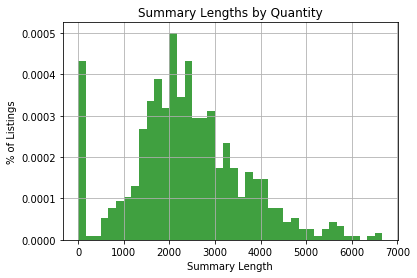

In [746]:
# Histogram of Summary Lengths
import matplotlib.pyplot as plt

# Settings
n, bins, patches = plt.hist(df['summary_length'], 40, normed=1, facecolor='green', alpha=0.75)

# Labels
plt.xlabel('Summary Length')
plt.ylabel('% of Listings')
plt.title('Summary Lengths by Quantity')
plt.grid(True)

# Show
plt.show()

## After looking at the listings sorted by summary_length, looks like there's a jump from ~150 to ~300, so we'll use that as the cutoff.

In [747]:
# Keep listings whose summary lengths are >= 150
df1 = df[df['summary_length'] >= 150]
df1.shape

(644, 7)

## Gotta reindex after you drop rows or there will be problems.

In [748]:
# Re-index df1
df1 = df1.reset_index(drop=True)

## Look at distribution again so that I can feel good about myself.

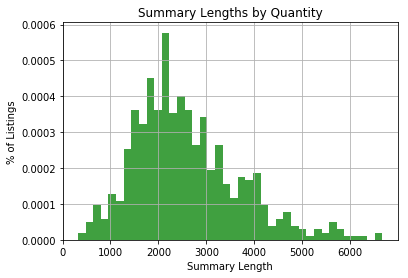

In [749]:
# Settings
n, bins, patches = plt.hist(df1['summary_length'], 40, normed=1, facecolor='green', alpha=0.75)

# Labels
plt.xlabel('Summary Length')
plt.ylabel('% of Listings')
plt.title('Summary Lengths by Quantity')
plt.grid(True)

# Show
plt.show()

## Summary Statistics of sumary_length

In [750]:
df2['summary_length'].describe()

count     681.000000
mean     2607.581498
std      1087.507514
min       321.000000
25%      1826.000000
50%      2425.000000
75%      3224.000000
max      7866.000000
Name: summary_length, dtype: float64

## This dictionary controls how mentions are counted. The dictionary keys become column headers. If any one of the strings in the lists on the right hand side are mentioned in the summary, then that observation gets a 1 in that column
#### If a term is already a subset of another one i.e. "java" is a subset of "javascript". Then that term should be included with spaces on either side in order to indicate that it must be found as an isolated word.

In [751]:
word_dict = {
    'javascript': ['javascript'],
    'react': ['react'],
    'angular': ['angular'],
    'node': ['node'],
    'jquery': ['jquery'],
    'mongo': ['mongo'],
    'java': [' java '],
    'jsp': ['jsp'],
    'spring': ['spring'],
    'python': ['python'],
    'php': ['php'],
    'ruby': ['ruby'],
    'rails': ['rails'],
    'c': [' c '],
    'c++': ['c++'],
    'c#': ['c#'],
    '.net': ['.net'],
    'html': ['html'],
    'css': ['css'],
    'bootstrap': ['bootstrap'],
    'front end': ['front end', 'frontend'], 
    'back end': ['back end', 'backend'],
    'swift': ['swift'],
    'ios': ['ios'],
    'android': ['android'],
    'agile': ['agile'],
    'scrum': ['scrum'],
    'ajax': ['ajax'],
    'rest': [' rest ', 'restful'],
    'api': ['api'],
    'json': ['json'],
    'git': ['git'],
    'github': ['github'],
    'sql': [' sql '],
    'mysql': ['mysql'],
    'go': [' go ', 'golang'],
    'scala': ['scala'],
    'kubernetes': ['kubernetes'],
    'regex': ['regex'],
    'nosql': ['nosql'],
    'aws': ['aws'],
    'azure': ['azure'],
    'postgres': ['postgres'],
    'devops': ['devops'],
    'mvc': ['mvc'],
    'orm': [' orm '],
    'testing': ['testing'],
    'quality assurance': ['quality assurance', 'qa'],
    'responsive': ['responsive'],
    'unix': ['unix'],
    'linux': ['linux'],
    'data structure': ['data structure'],
    'algorithm': ['algorithm'],
    'object oriented': ['object oriented'],
    'bachelor': ['bachelor'],
    'degree': ['degree'],
    'computer science': ['computer science', ' cs '],
    'information systems': ['information systems']
}

## This function calculates mentions and adds them to the dataframe as described above.

In [752]:
def get_mentions(word_dict):
    # Loop through terms in dictionary
    for key in word_dict:
        # Create word list of dict values for each term
        words = []
        for value in word_dict[key]:
            words.append(value)
            # Loop through summaries to look for words
            for i, row in df1.iterrows():
                if any(word in row.summary for word in words):
                    df1.loc[i, key]=1
                else:
                    df1.loc[i, key]=0

get_mentions(word_dict)

df1.head()

,id,url,location,job_title,company,summary,summary_length,javascript,react,angular,node,jquery,mongo,java,jsp,spring,python,php,ruby,rails,c,c++,c#,.net,html,css,bootstrap,front end,back end,swift,ios,android,agile,scrum,ajax,rest,api,json,git,github,sql,mysql,go,scala,kubernetes,regex,nosql,aws,azure,postgres,devops,mvc,orm,testing,quality assurance,responsive,unix,linux,data structure,algorithm,object oriented,bachelor,degree,computer science,information systems
0,0,http://www.indeed.com/rc/clk?jk=acec0008c6542da0&fccid=5a31ef999afce663&vjs=3,Connecticut,Full Stack Software Engineer,Nine Summer,this position is on the product team responsible for a leading saas product that is used by orga...,3024.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,http://www.indeed.com/rc/clk?jk=4b9111710c4bc473&fccid=aeb15e43a6800b9d&vjs=3,Connecticut,Software Engineer Asc,Lockheed Martin,this lockheed martin enterprise business services ebs software engineer position is a java cots ...,3219.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,http://www.indeed.com/rc/clk?jk=f68563da3f0597a9&fccid=e9e363d6332bc1cd&vjs=3,"Sunnyvale, CA",Software Engineer 1,Juniper Networks,software engineer backend did you spend four or more years working hard towards your education t...,1561.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,http://www.indeed.com/rc/clk?jk=937b1f1f803a9870&fccid=4db2ddf023fb6496&vjs=3,"Denver, CO",Senior Software Engineer,Rebric,rebric is looking for a senior software engineer to help shape and build a team that embraces a ...,1594.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,http://www.indeed.com/rc/clk?jk=1a61b0a758b3ecf9&fccid=53c1573dc4db9cab&vjs=3,"West Melbourne, FL",Software Engineer,General Electric,about us ge is the world's digital industrial company transforming industry with software define...,4254.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [753]:
# Total number of terms mentioned
# https://stackoverflow.com/questions/25748683/pandas-sum-dataframe-rows-for-given-columns/25748826
col_list = list(df1)

# Remove numeric columns that we don't to be part of the sum.
col_list.remove('summary_length')
col_list.remove('id')
if 'word_count' in col_list:
    col_list.remove('word_count')

print(col_list)

# Summing in this way only sums numeric columns in df1[col_list]
df1['word_count'] = df1[col_list].sum(axis=1)

df1.head(200)

['url', 'location', 'job_title', 'company', 'summary', 'javascript', 'react', 'angular', 'node', 'jquery', 'mongo', 'java', 'jsp', 'spring', 'python', 'php', 'ruby', 'rails', 'c', 'c++', 'c#', '.net', 'html', 'css', 'bootstrap', 'front end', 'back end', 'swift', 'ios', 'android', 'agile', 'scrum', 'ajax', 'rest', 'api', 'json', 'git', 'github', 'sql', 'mysql', 'go', 'scala', 'kubernetes', 'regex', 'nosql', 'aws', 'azure', 'postgres', 'devops', 'mvc', 'orm', 'testing', 'quality assurance', 'responsive', 'unix', 'linux', 'data structure', 'algorithm', 'object oriented', 'bachelor', 'degree', 'computer science', 'information systems']


,id,url,location,job_title,company,summary,summary_length,javascript,react,angular,node,jquery,mongo,java,jsp,spring,python,php,ruby,rails,c,c++,c#,.net,html,css,bootstrap,front end,back end,swift,ios,android,agile,scrum,ajax,rest,api,json,git,github,sql,mysql,go,scala,kubernetes,regex,nosql,aws,azure,postgres,devops,mvc,orm,testing,quality assurance,responsive,unix,linux,data structure,algorithm,object oriented,bachelor,degree,computer science,information systems,word_count
0,0,http://www.indeed.com/rc/clk?jk=acec0008c6542da0&fccid=5a31ef999afce663&vjs=3,Connecticut,Full Stack Software Engineer,Nine Summer,this position is on the product team responsible for a leading saas product that is used by orga...,3024.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0
1,1,http://www.indeed.com/rc/clk?jk=4b9111710c4bc473&fccid=aeb15e43a6800b9d&vjs=3,Connecticut,Software Engineer Asc,Lockheed Martin,this lockheed martin enterprise business services ebs software engineer position is a java cots ...,3219.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0
2,2,http://www.indeed.com/rc/clk?jk=f68563da3f0597a9&fccid=e9e363d6332bc1cd&vjs=3,"Sunnyvale, CA",Software Engineer 1,Juniper Networks,software engineer backend did you spend four or more years working hard towards your education t...,1561.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0
3,3,http://www.indeed.com/rc/clk?jk=937b1f1f803a9870&fccid=4db2ddf023fb6496&vjs=3,"Denver, CO",Senior Software Engineer,Rebric,rebric is looking for a senior software engineer to help shape and build a team that embraces a ...,1594.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
4,4,http://www.indeed.com/rc/clk?jk=1a61b0a758b3ecf9&fccid=53c1573dc4db9cab&vjs=3,"West Melbourne, FL",Software Engineer,General Electric,about us ge is the world's digital industrial company transforming industry with software define...,4254.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,10.0
5,5,http://www.indeed.com/rc/clk?jk=1a8af41d788df61d&fccid=c1099851e9794854&vjs=3,"Santa Clara Valley, CA","Software Engineer, Robotics",Apple,apple is looking for a talented proactive and results oriented senior software engineer. the suc...,1657.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,10.0
6,6,http://www.indeed.com/rc/clk?jk=106a8d96e01e0ddd&fccid=105ecfd0283f415f&vjs=3,Connecticut,Software Engineer Lead,Capgemini,about capgemini with more than 193 000 people in over 44 countries capgemini is one of the world...,2365.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
7,7,http://www.indeed.com/rc/clk?jk=91abe1824773a6cc&fccid=b5eb441990b44e2d&vjs=3,"San Diego, CA","Software Engineer (College Grad), Payments Team",Classy,position description cl

## We sum the number of terms mentioned in each listing and plot the distribution. An high number of listings with a low number of terms mentioned would suggest that there are more terms that we need to add to the dictionary. Some job listings just aren't very specific.

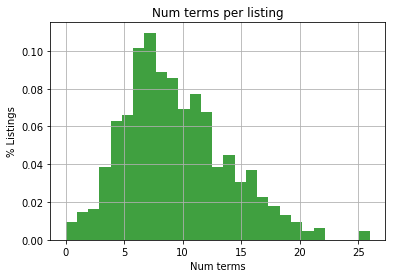

In [754]:
# Settings
n, bins, patches = plt.hist(df1['word_count'], 27, normed=1, facecolor='green', alpha=0.75)
# Label3
plt.xlabel('Num terms')
plt.ylabel('% Listings')
plt.title('Num terms per listing')
plt.grid(True)

# Show
plt.show()

## Summary statistics for number of terms per listing if anybody's curious.

In [755]:
df1['word_count'].describe()

count    644.000000
mean       9.299689
std        4.612371
min        0.000000
25%        6.000000
50%        9.000000
75%       12.000000
max       26.000000
Name: word_count, dtype: float64

## We'll now create a new dataframe to hold our results and create pretty graphs where we can compare percentages before and after the filtering out certain technologies.

In [756]:
# Get list of terms for first column
terms = list(df1)
list_to_remove = ['id', 'url', 'location', 'job_title', 'company', 'summary', 'summary_length', 'word_count']
terms = list(set(terms).difference(set(list_to_remove)))

# Create new dataframe with terms list as first series/column
results = pd.DataFrame()
results['topic'] = pd.Series(terms)

results.head()

,topic
0,front end
1,degree
2,mongo
3,regex
4,ruby


## Get counts, totals, and percentages.

In [757]:
# Get Column Totals from df1
mentions = []
for i, row in results.iterrows():
    mentions.append(df1[row.topic].sum())
results['count'] = mentions

# Set total column
results['total'] = df1.shape[0]

# Calculate Percent column
results['percent'] = (results['count'] / results['total'])*100

# Sort and reindex dataframe by percent
results = results.sort_values(by=['percent'], ascending=False)
results = results.reset_index(drop=True)

results.head(58)

,topic,count,total,percent
0,computer science,427.0,644,66.304348
1,degree,310.0,644,48.136646
2,java,275.0,644,42.701863
3,c++,246.0,644,38.198758
4,api,240.0,644,37.267081
5,python,237.0,644,36.801242
6,bachelor,235.0,644,36.490683
7,testing,229.0,644,35.559006
8,javascript,215.0,644,33.385093
9,scala,189.0,644,29.347826


## Filter out any listings that mention "java" and calculate percentages again.

In [758]:
# Filter out a certain column - 'java' in this instance
no_java = df1[df1['java'] != 1] 

# Get Column Totals from no_java
mentions = []
for i, row in results.iterrows():
    mentions.append(no_java[row.topic].sum())
results['count_no_java'] = mentions

# Set total column
results['total_no_java'] = no_java.shape[0]

# Calculate Percent column
results['percent_no_java'] = (results['count_no_java'] / results['total_no_java'])*100

# Sort and reindex dataframe by percent
# results = results.sort_values(by=['percent_no_java'], ascending=False)
# results = results.reset_index(drop=True)

results.head(58)

# Calculate filtered results using no_java

,topic,count,total,percent,count_no_java,total_no_java,percent_no_java
0,computer science,427.0,644,66.304348,237.0,369,64.227642
1,degree,310.0,644,48.136646,162.0,369,43.902439
2,java,275.0,644,42.701863,0.0,369,0.000000
3,c++,246.0,644,38.198758,148.0,369,40.108401
4,api,240.0,644,37.267081,134.0,369,36.314363
5,python,237.0,644,36.801242,129.0,369,34.959350
6,bachelor,235.0,644,36.490683,131.0,369,35.501355
7,testing,229.0,644,35.559006,130.0,369,35.230352
8,javascript,215.0,644,33.385093,100.0,369,27.100271
9,scala,189.0,644,29.347826,77.0,369,20.867209


## Make Caleb's Favorite Graph

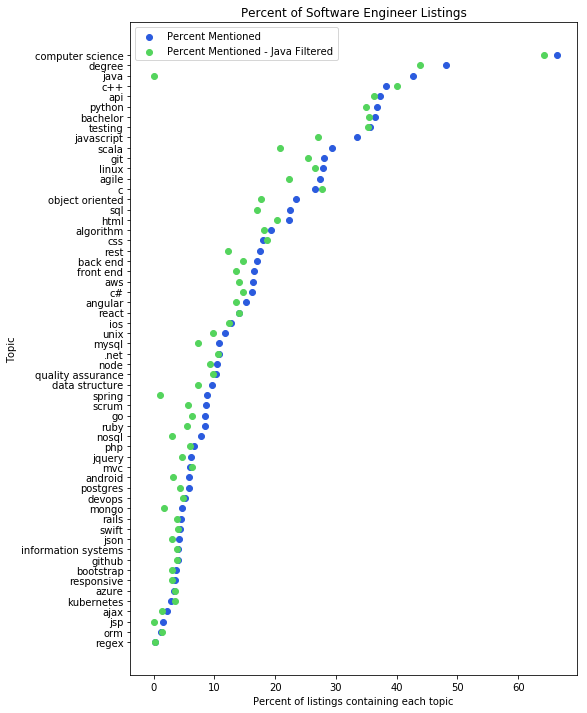

In [759]:
# Plot Median starting and Mid-Career Salaries

fig = plt.figure(figsize=(8,12))

x = results['percent']
y = len(results.index) - results.index
labels = results['topic']

plt.scatter(x, y, color='#2b5bde', label = 'Percent Mentioned')
plt.yticks(y, labels)

x3 = results['percent_no_java']
plt.scatter(x3, y, color='#54d45d', label = 'Percent Mentioned - Java Filtered')

plt.xlabel('Percent of listings containing each topic')
plt.ylabel('Topic')
plt.title('Percent of Software Engineer Listings')
plt.legend(loc=2) #move the legend
plt.show()


In [760]:
# Lets try some clustering and dendrogram creation.
# Nice Blog Posts about how to use this lib: 
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
from scipy.cluster.hierarchy import dendrogram, linkage

In [761]:
# Get only the individual topic count information - transpose matrix to cluster by topic.
X = df1[terms]
X = X.transpose()
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643
front end,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
degree,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,

In [762]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [763]:
# "The closer the value is to 1, the better the clustering preserves the original distances"
# So... Not super good. We'll see if the results still make any intuitive sense.
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.77600334237321744

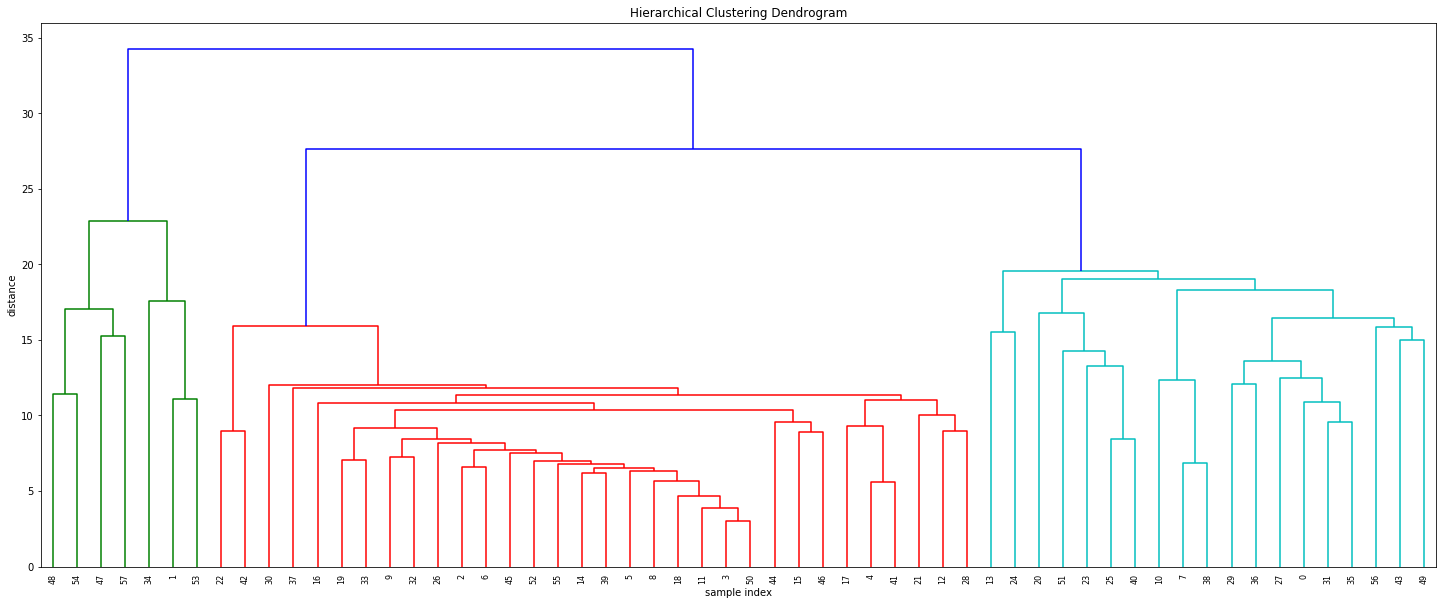

In [764]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [765]:
cluster1 = [48,54,47,57,34,1,53]
cluster2 = [22,42,30,37,16,19,33,9,32,26,2,6,45,52,55,14,39,5,8,18,11,3,50,44,15,46,17,4,41,21,12,28]
cluster3 = [13,24,20,51,23,25,40,10,7,38,29,36,27,0,31,35,56,43,49]

index_list = list(X.index)
# print(type(topics))
topics = pd.DataFrame()
index_list = pd.Series(index_list)
topics['topic'] = index_list.values
topics.head()

print('+----- Cluster One: -----+')
for i, row in topics.iterrows():
    if i in cluster1:
        print(row.topic)
        
print('+-----Cluster Two: -----+')    
for i, row in topics.iterrows():
    if i in cluster2:
        print(row.topic)
        
print('+-----Cluster Three: -----+')      
for i, row in topics.iterrows():
    if i in cluster3:
        print(row.topic)

+----- Cluster One: -----+
degree
computer science
python
c
bachelor
c++
linux
+-----Cluster Two: -----+
mongo
regex
ruby
responsive
json
kubernetes
swift
jsp
mysql
azure
spring
quality assurance
go
ajax
mvc
node
algorithm
postgres
php
ios
android
jquery
unix
bootstrap
rails
data structure
scrum
devops
nosql
orm
information systems
github
+-----Cluster Three: -----+
front end
css
javascript
scala
testing
sql
java
c#
back end
aws
react
angular
rest
html
.net
agile
git
object oriented
api


In [766]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

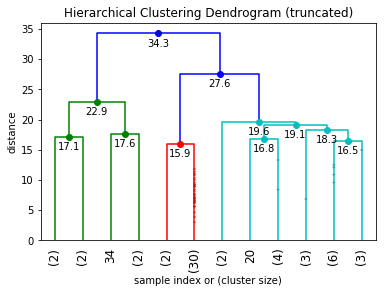

In [767]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

In [768]:
# Summarize clusters into 10 biggest clusters
from scipy.cluster.hierarchy import fcluster
max_d = 16.5
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([10,  3,  5,  5,  5,  5,  5,  9,  5,  5,  9,  5,  5,  6,  5,  5,  5,
        5,  5,  5,  8,  5,  5,  7,  6,  7,  5, 10,  5, 10,  5, 10,  5,  5,
        4, 10, 10,  5,  9,  5,  7,  5,  5, 10,  5,  5,  5,  2,  1, 10,  5,
        7,  5,  3,  1,  5, 10,  2], dtype=int32)

In [769]:
clusters = list(clusters)
clusters = pd.Series(clusters)
topics['cluster'] = clusters.values

topics.head()

,topic,cluster
0,front end,10
1,degree,3
2,mongo,5
3,regex,5
4,ruby,5


In [770]:
# Print topics summarized into 10 different clusters.
print('+----- Cluster 1 -----+')
for i, row in topics.iterrows():
    if row.cluster == 1:
        print(row.topic)

print('+----- Cluster 2 -----+')
for i, row in topics.iterrows():
    if row.cluster == 2:
        print(row.topic)
        
print('+----- Cluster 3 -----+')
for i, row in topics.iterrows():
    if row.cluster == 3:
        print(row.topic)
        
print('+----- Cluster 4 -----+')
for i, row in topics.iterrows():
    if row.cluster == 4:
        print(row.topic)
        
print('+----- Cluster 5 -----+')
for i, row in topics.iterrows():
    if row.cluster == 5:
        print(row.topic)
        
print('+----- Cluster 6 -----+')
for i, row in topics.iterrows():
    if row.cluster == 6:
        print(row.topic)
        
print('+----- Cluster 7 -----+')
for i, row in topics.iterrows():
    if row.cluster == 7:
        print(row.topic)
        
print('+----- Cluster 8 -----+')
for i, row in topics.iterrows():
    if row.cluster == 8:
        print(row.topic)
        
print('+----- Cluster 9 -----+')
for i, row in topics.iterrows():
    if row.cluster == 9:
        print(row.topic)
        
print('+----- Cluster 10 -----+')
for i, row in topics.iterrows():
    if row.cluster == 10:
        print(row.topic)


+----- Cluster 1 -----+
c
c++
+----- Cluster 2 -----+
python
linux
+----- Cluster 3 -----+
degree
bachelor
+----- Cluster 4 -----+
computer science
+----- Cluster 5 -----+
mongo
regex
ruby
responsive
json
kubernetes
swift
jsp
mysql
azure
spring
quality assurance
go
ajax
mvc
node
algorithm
postgres
php
ios
android
jquery
unix
bootstrap
rails
data structure
scrum
devops
nosql
orm
information systems
github
+----- Cluster 6 -----+
scala
java
+----- Cluster 7 -----+
sql
c#
.net
object oriented
+----- Cluster 8 -----+
testing
+----- Cluster 9 -----+
css
javascript
html
+----- Cluster 10 -----+
front end
back end
aws
react
angular
rest
agile
git
api
